<a href="https://colab.research.google.com/github/Saket22-CS/Saket-Infosys-Nov24/blob/main/FutureCart_Infosys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Data Preprocessing for Sales Data
## Project Overview
This project involves performing Exploratory Data Analysis (EDA) and data preprocessing on sales data. Our goal is to clean and prepare the data, identify trends and patterns, and gain insights through visualizations. This analysis will include handling missing values, identifying and treating outliers, and understanding correlations between different variables.

## Objectives:
- Ensure the sales data is in a time series format.
- Clean and format the data, addressing missing values and outliers.
- Visualize data distributions and trends over time.
- Identify relationships between variables through correlation analysis.
- Summarize the data with key statistical metrics.

## Key Steps in This Notebook:
1. Basic Data Checks
2. Handling Missing Values
3. Outlier Detection and Treatment (using 97th percentile)
4. Feature Engineering (time-based features)
5. Data Visualization (including distribution plots, time series plots, and pie charts)
6. Correlation Analysis
7. Statistical Summaries


In [3]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization styles
plt.style.use('ggplot')
sns.set_palette('viridis')



## 1. Basic Data Checks
Before starting any analysis, it's essential to conduct basic checks to understand the structure of the data and ensure it's suitable for further processing.


In [6]:
# Loading the data from Excel files into DataFrames
sales_data = pd.read_excel('/content/ProductA.xlsx')  # Load sales data
google_clicks = pd.read_excel('/content/ProductA_google_clicks.xlsx')  # Load Google clicks data
fb_impressions = pd.read_excel('/content/ProductA_fb_impressions.xlsx')  # Load Facebook impressions data



In [7]:
# Displaying basic information about the structure of each dataset
print("Sales Data Overview:")
sales_data.info()  # Shows data types, non-null counts, and memory usage


Sales Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Quantity   212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [8]:
print("\nGoogle Clicks Data Overview:")
google_clicks.info()  # Provides the same details for the Google clicks dataset



Google Clicks Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  212 non-null    datetime64[ns]
 1   Clicks     212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [9]:
print("\nFacebook Impressions Data Overview:")
fb_impressions.info()  # Provides the same details for the Facebook impressions dataset



Facebook Impressions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [10]:
print("\nPreview of Sales Data:")
display(sales_data.head())  # Use `head()` to get a quick look at the first few rows of the dataset



Preview of Sales Data:


,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


In [22]:
# Checking the summary statistics of the sales data for any anomalies or data type issues
print("\nSales Data Summary:")
display(sales_data.describe())


Sales Data Summary:


,Day Index,Quantity
count,212,212.000000
mean,2022-03-16 12:00:00,17.430896
min,2021-12-01 00:00:00,5.000000
25%,2022-01-22 18:00:00,13.750000
50%,2022-03-16 12:00:00,17.000000
75%,2022-05-08 06:00:00,21.000000
max,2022-06-30 00:00:00,31.000000
std,NaN,5.467691


## 2. Handling Missing Values
Missing values can skew results and lead to biased analyses. We'll identify and handle missing values using appropriate imputation techniques.


In [12]:
# Checking for missing values in the datasets
print("\nMissing Values in Sales Data:")
print(sales_data.isnull().sum())
print("\nMissing Values in Google Clicks Data:")
print(google_clicks.isnull().sum())
print("\nMissing Values in Facebook Impressions Data:")
print(fb_impressions.isnull().sum())

# Handling missing values by filling them with the mean of their respective columns
sales_data.fillna(sales_data.mean(), inplace=True)
google_clicks.fillna(google_clicks.mean(), inplace=True)
fb_impressions.fillna(fb_impressions.mean(), inplace=True)



Missing Values in Sales Data:
Day Index    0
Quantity     0
dtype: int64

Missing Values in Google Clicks Data:
Day Index    0
Clicks       0
dtype: int64

Missing Values in Facebook Impressions Data:
Day Index      0
Impressions    0
dtype: int64


## 3. Outlier Detection and Treatment
Outliers can distort the analysis. We use the interquartile range (IQR) method to detect outliers and replace them with the 97th percentile value.


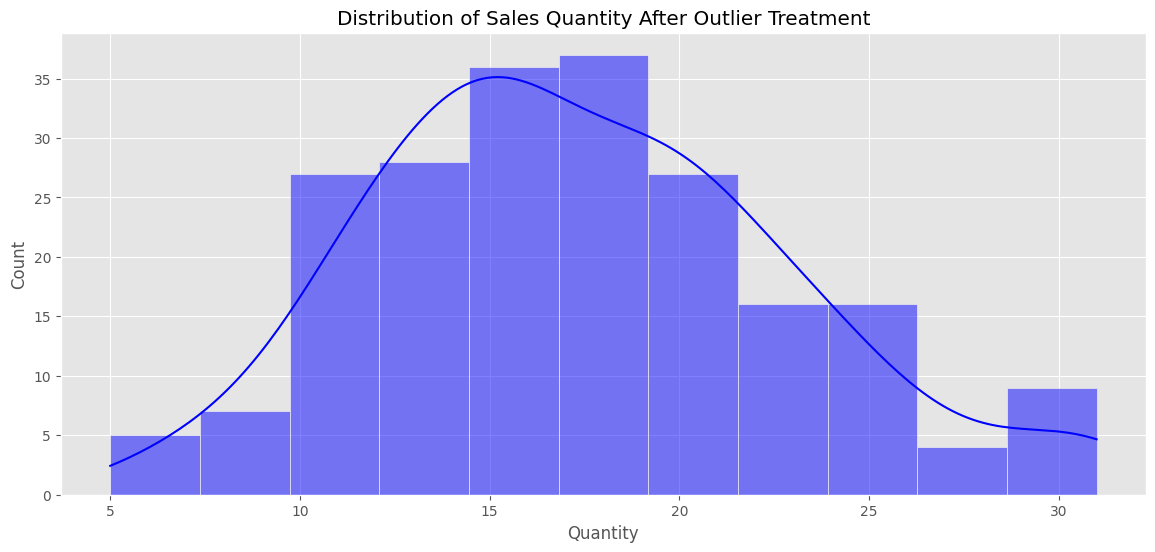

In [13]:
# Function to replace outliers with the 97th percentile value
def impute_outliers_97th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_97_value = series.quantile(0.97)
    return series.apply(lambda x: percentile_97_value if x < lower_bound or x > upper_bound else x)

# Applying the outlier treatment to the 'Quantity' column
sales_data['Quantity'] = impute_outliers_97th_percentile(sales_data['Quantity'])

# Plotting the distribution of 'Quantity' after outlier treatment
plt.figure(figsize=(14, 6))
sns.histplot(sales_data['Quantity'], kde=True, color='blue')
plt.title('Distribution of Sales Quantity After Outlier Treatment')
plt.xlabel('Quantity')
plt.show()


### Explanation:
- **Outlier Treatment**: We replaced extreme outliers beyond 1.5 * IQR with the 97th percentile value to maintain data integrity while minimizing skew.


## 4. Feature Engineering
To enhance our analysis, we will create new time-based features like week, day, month, and quarter to better understand temporal patterns.


In [23]:
# Converting 'Date' columns to datetime format
sales_data['Day Index'] = pd.to_datetime(sales_data['Day Index'], errors='coerce')
google_clicks['Day Index'] = pd.to_datetime(google_clicks['Day Index'], errors='coerce')
fb_impressions['Day Index'] = pd.to_datetime(fb_impressions['Day Index'], errors='coerce')

# Merging the datasets on 'Date'
merged_data = pd.merge(sales_data, google_clicks, on='Day Index', how='outer')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='outer')
merged_data.sort_values('Day Index', inplace=True)

# Adding new time-based features
merged_data['Week'] = merged_data['Day Index'].dt.isocalendar().week
merged_data['Day'] = merged_data['Day Index'].dt.day
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Quarter'] = merged_data['Day Index'].dt.quarter

# Displaying a preview of the data with new features
print("Merged Data with Time-Based Features:")
display(merged_data.head())


Merged Data with Time-Based Features:


,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter
0,2021-12-01,14.00,445,620,48,1,12,4
1,2021-12-02,10.00,433,890,48,2,12,4
2,2021-12-03,13.00,424,851,48,3,12,4
3,2021-12-04,22.00,427,881,48,4,12,4
4,2021-12-05,30.67,451,678,48,5,12,4


### Explanation:
- **Feature Engineering**: We created features for `Week`, `Day`, `Month`, and `Quarter` to enable time-based analysis and enhance predictive modeling.


## 5. Data Visualization
### a. Sales Quantity Over Time
We will plot the sales quantity over time to identify any trends or seasonality.


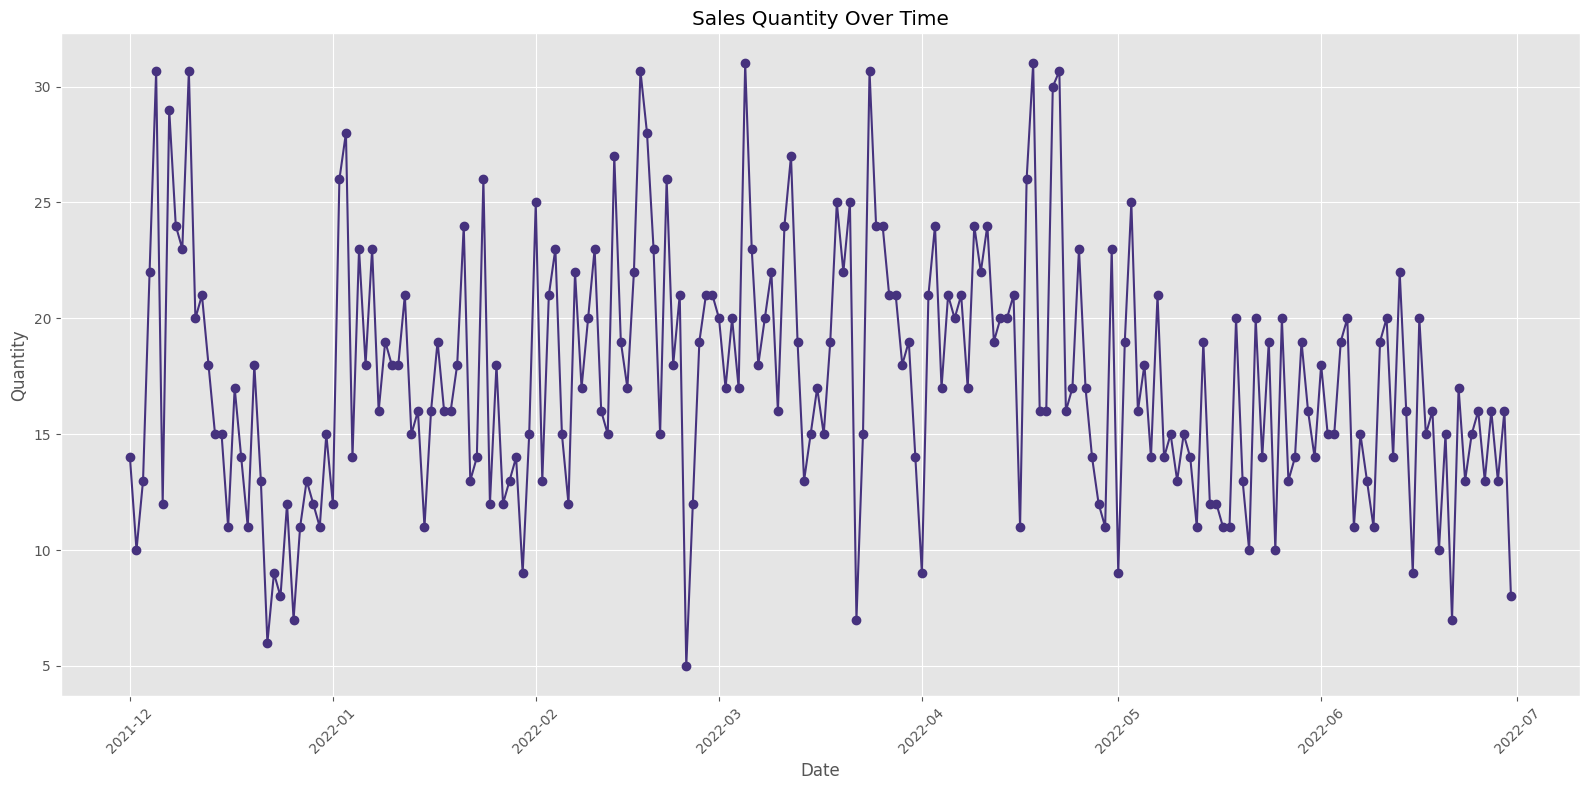

In [25]:
# Plotting the time series of sales quantity
plt.figure(figsize=(16, 8))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Quantity', marker='o')
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:
- **Time Series Plot**: Visualizes trends, seasonal patterns, and potential anomalies in the sales data.


## b. Sales Distribution by Month, Day, Week, and Quarter
### Objective:
These visualizations help in understanding the distribution of sales across different time periods. Pie charts provide a clear and quick overview of how sales quantities are spread throughout months, days, weeks, and quarters, aiding in identifying peak sales periods.




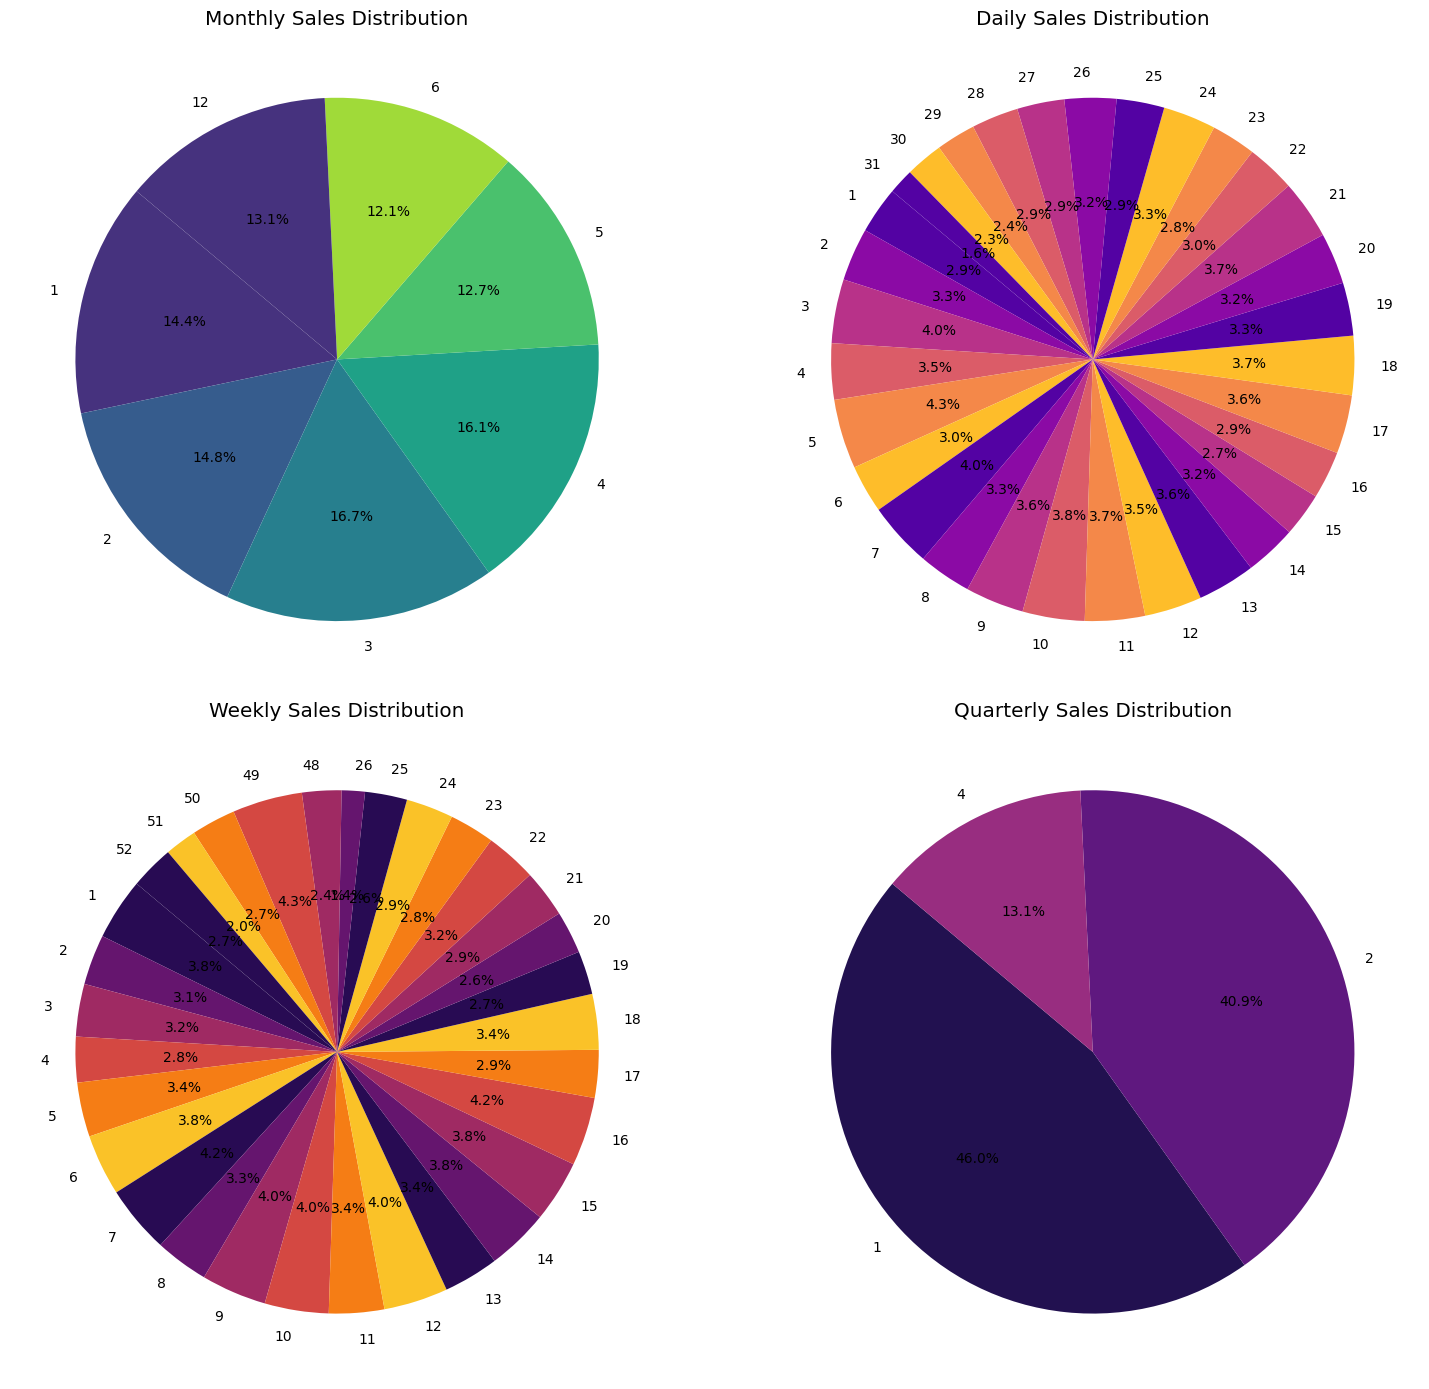

In [29]:
# Grouping data by Month, Day, Week, and Quarter and calculating total sales
monthly_sales = merged_data.groupby('Month')['Quantity'].sum()
daily_sales = merged_data.groupby('Day')['Quantity'].sum()
weekly_sales = merged_data.groupby('Week')['Quantity'].sum()
quarterly_sales = merged_data.groupby('Quarter')['Quantity'].sum()

# Plotting pie charts for each time-based sales distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Monthly Sales Distribution
axes[0, 0].pie(monthly_sales, labels=monthly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
axes[0, 0].set_title('Monthly Sales Distribution')

# Daily Sales Distribution
axes[0, 1].pie(daily_sales, labels=daily_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))
axes[0, 1].set_title('Daily Sales Distribution')

# Weekly Sales Distribution
axes[1, 0].pie(weekly_sales, labels=weekly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('inferno'))
axes[1, 0].set_title('Weekly Sales Distribution')

# Quarterly Sales Distribution
axes[1, 1].pie(quarterly_sales, labels=quarterly_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'))
axes[1, 1].set_title('Quarterly Sales Distribution')

# Adjusting layout for better display
plt.tight_layout()
plt.show()


### Explanation of the Pie Charts:
- **Monthly Sales Distribution**: Visualizes how total sales are distributed across each month of the year. This can help identify seasonality and high-demand months.
- **Daily Sales Distribution**: Shows which days of the month contribute most to total sales, helping pinpoint specific high or low sales days.
- **Weekly Sales Distribution**: Provides insights into which weeks of the year see higher sales volumes, useful for understanding weekly patterns or anomalies.
- **Quarterly Sales Distribution**: Highlights which quarters contribute most to overall sales, assisting in strategic planning and quarterly performance reviews.

### c. Correlation Analysis
Understanding how features are related can provide insights into potential predictors for future models.


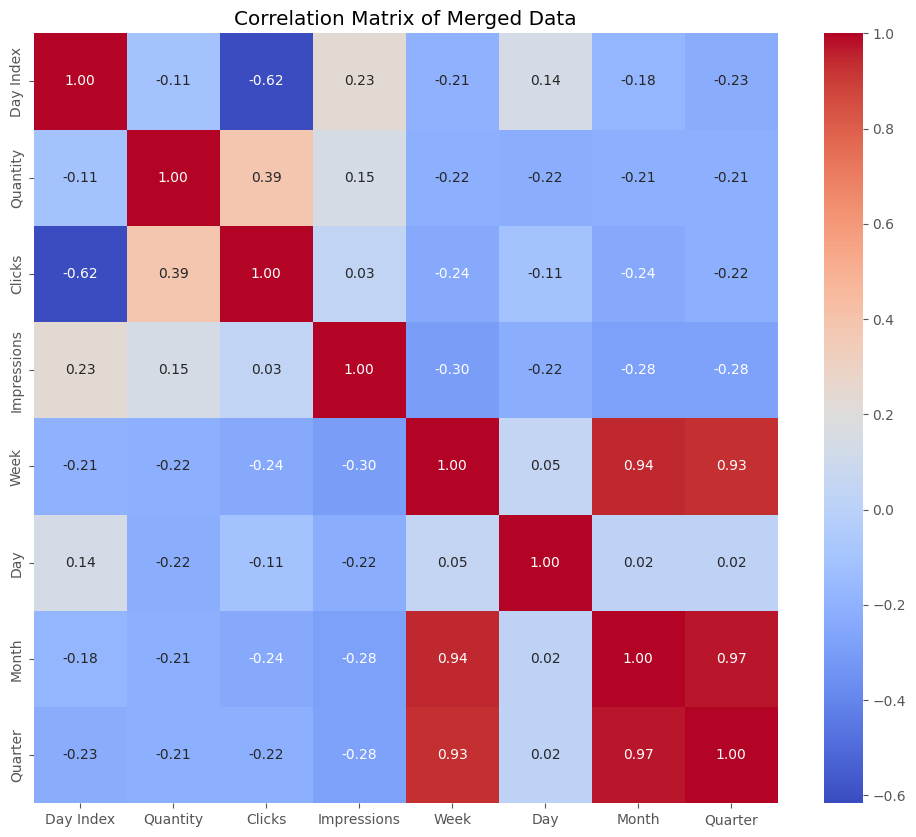

In [27]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged Data')
plt.show()


### Explanation:
- **Correlation Heatmap**: Highlights the relationships between variables, which helps identify potential predictive features.


## 6. Statistical Summaries
Summarizing the data provides key metrics for a better understanding of central tendencies and variability.


In [30]:
# Displaying the final statistical summary
print("Final Statistical Summary of Merged Data:")
display(merged_data.describe())


Final Statistical Summary of Merged Data:


,Day Index,Quantity,Clicks,Impressions,Week,Day,Month,Quarter
count,212,212.000000,212.00000,212.000000,212.0,212.000000,212.000000,212.000000
mean,2022-03-16 12:00:00,17.430896,358.20283,1531.702830,19.023585,15.660377,4.750000,1.867925
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000,1.0,1.000000,1.000000,1.000000
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000,8.0,8.000000,2.000000,1.000000
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000,16.0,16.000000,4.000000,2.000000
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000,23.0,23.000000,6.000000,2.000000
max,2022-06-30 00:00:00,31.000000,726.00000,2707.000000,52.0,31.000000,12.000000,4.000000
std,NaN,5.467691,164.52160,440.660783,15.022713,8.788065,3.399017,0.998344


## Conclusion
This comprehensive EDA and feature engineering process prepared the data for advanced predictive modeling. Key insights were drawn from the data through visualizations and detailed analysis. This notebook sets the stage for developing forecasting models to predict future sales trends.
